In [1]:
import pandas as pd
from tqdm import tqdm
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import re
import gensim
import gensim.corpora as corpora
from pprint import pprint
import pandas as pd
from tqdm import tqdm
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
all_df = pd.read_csv("tweet_all.csv", lineterminator="\n")
df = all_df.copy()
df.shape

(1810294, 10)

Split into three phases: 02/20-08/20, 09/20-03/21, 04/21-07/21.

# Phase 1: 02/01/2020 - 08/31/2020

In [14]:
df_1 = df[:855122]
df_1.tail(1)

,tweet_id,combined_text,time,favourites_count,followers_count,friends_count,statuses_count,rt_status,state,token_list
855121,1300584077020614657,31/08/2020 19:59:42 Another American has died ...,08-31-2020,0,1,0,26595,0,NaN,"['31/08', '2020', '42', 'american', 'die', '#e..."


In [15]:
# list of word list
tokens_list = []
# list of all words
words = []
for i in tqdm(range(len(df_1))):
    token_list = df.iloc[i]["token_list"].replace("'", "").replace(" ", "")[1:-1].split(",")
    tokens_list.append(token_list)
    words += token_list

100%|██████████| 855122/855122 [01:24<00:00, 10178.99it/s]


In [19]:
len(tokens_list)

855122

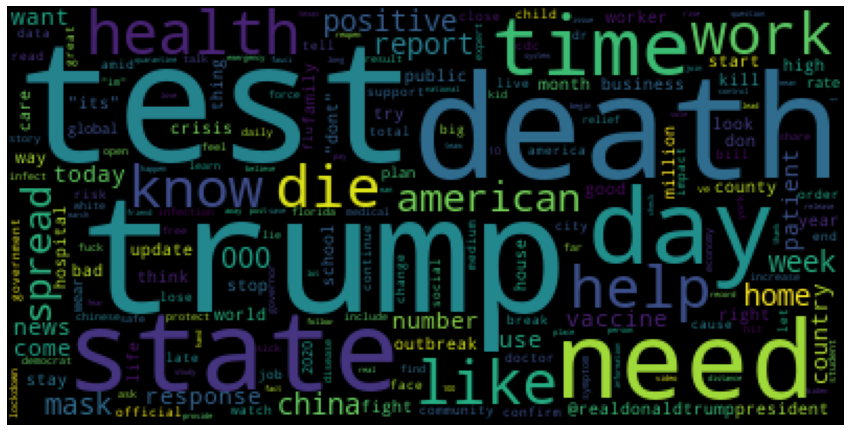

In [16]:
plt.figure(figsize=(15, 15))

plt.plot()
word_could_dict=Counter(words)
#print(word_could_dict)

wordcloud = WordCloud().generate_from_frequencies(word_could_dict)
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

In [17]:
Counter(words).most_common(10)

[('test', 86318),
 ('trump', 81906),
 ('death', 68954),
 ('state', 47031),
 ('need', 43686),
 ('day', 41769),
 ('time', 41199),
 ('health', 40902),
 ('like', 40879),
 ('die', 37668)]

In [22]:
model_1 = Word2Vec(sentences=tokens_list, vector_size=100, window=5, min_count=20, workers=4)
model_1.save("phase1.model")

In [31]:
model_1.wv.most_similar("vaccine")

[('vax', 0.7637525200843811),
 ('vaccination', 0.6838314533233643),
 ('jab', 0.6765215992927551),
 ('vaxx', 0.6717536449432373),
 ('#vaccine', 0.6513705253601074),
 ('treatment', 0.591407835483551),
 ('booster', 0.5893985629081726),
 ('pfizer', 0.5788429379463196),
 ('shot', 0.5766420960426331),
 ('drug', 0.5714090466499329)]

# Phase 2: 09/01/2020 - 02/28/2021

In [13]:
df_2 = df[855122:1474864]
df_2.tail(1)

,tweet_id,combined_text,time,favourites_count,followers_count,friends_count,statuses_count,rt_status,state,token_list
1474863,1366176129703436290,BILL GEIST UPDATE: My dad received the second ...,02-28-2021,213560,492,1596,95705,1,South Carolina,"['bill', 'geist', 'update', 'dad', 'receive', ..."


In [25]:
# list of word list
tokens_list_2 = []
# list of all words
words_2 = []
for i in tqdm(range(len(df_2))):
    token_list = df.iloc[i]["token_list"].replace("'", "").replace(" ", "")[1:-1].split(",")
    tokens_list_2.append(token_list)
    words_2 += token_list

100%|██████████| 619742/619742 [01:01<00:00, 10074.58it/s]


In [26]:
len(tokens_list_2)

619742

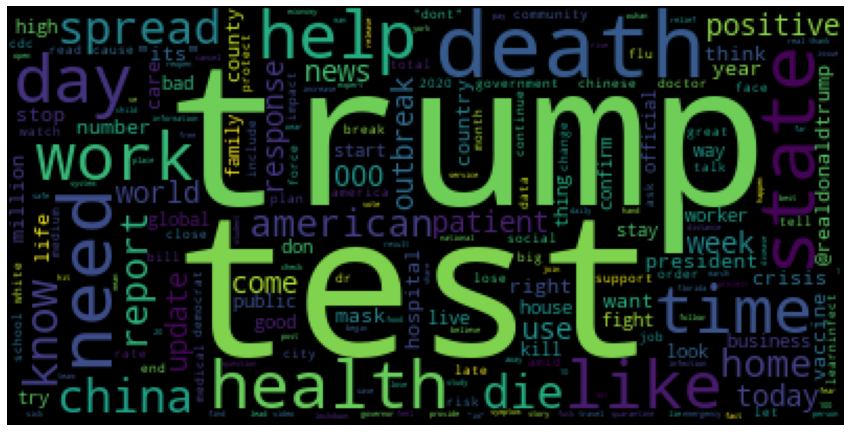

In [27]:
plt.figure(figsize=(15, 15))

plt.plot()
word_could_dict=Counter(words_2)
#print(word_could_dict)

wordcloud = WordCloud().generate_from_frequencies(word_could_dict)
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

In [28]:
Counter(words_2).most_common(10)

[('trump', 60601),
 ('test', 60380),
 ('death', 47153),
 ('state', 33733),
 ('need', 31802),
 ('health', 30463),
 ('time', 29678),
 ('day', 28808),
 ('like', 28478),
 ('help', 28010)]

In [42]:
model_2 = Word2Vec(sentences=tokens_list_2, vector_size=100, window=5, min_count=20, workers=4)
model_2.save("phase2.model")

In [44]:
model_2.wv.most_similar("vaccine")

[('vax', 0.7346543669700623),
 ('vaccination', 0.6638667583465576),
 ('#vaccine', 0.63477623462677),
 ('booster', 0.6001542806625366),
 ('experimental', 0.5960363745689392),
 ('pfizer', 0.5922337174415588),
 ('therapeutic', 0.5916171073913574),
 ('treatment', 0.5843332409858704),
 ('drug', 0.5509085059165955),
 ('breakthrough', 0.5472737550735474)]

# Phase 3: 03/01/2021 - 07/31/2021

In [33]:
df_3 = df[1474864:]
df_3.tail(1)

,tweet_id,combined_text,time,favourites_count,followers_count,friends_count,statuses_count,rt_status,state,token_list
1810293,1421681713009332226,When you start to get loss of taste and smell ...,08-01-2021,12586,816,670,19875,0,Texas,"['start', 'loss', 'taste', 'smell', 'like', 's..."


In [34]:
# list of word list
tokens_list_3 = []
# list of all words
words_3 = []
for i in tqdm(range(len(df_3))):
    token_list = df.iloc[i]["token_list"].replace("'", "").replace(" ", "")[1:-1].split(",")
    tokens_list_3.append(token_list)
    words_3 += token_list

100%|██████████| 335430/335430 [00:34<00:00, 9857.01it/s] 


In [37]:
len(tokens_list_3)

335430

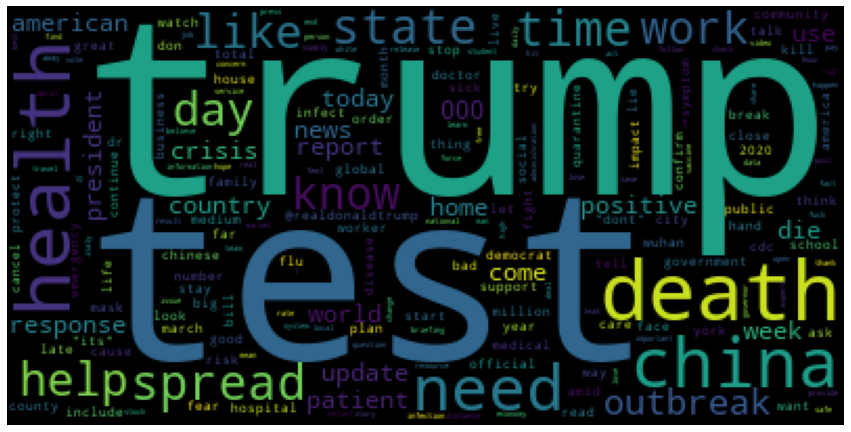

In [38]:
plt.figure(figsize=(15, 15))

plt.plot()
word_could_dict=Counter(words_3)
#print(word_could_dict)

wordcloud = WordCloud().generate_from_frequencies(word_could_dict)
plt.imshow(wordcloud)
plt.axis("off")

plt.show()

In [39]:
Counter(words_3).most_common(10)

[('trump', 36102),
 ('test', 33520),
 ('death', 20404),
 ('health', 17383),
 ('china', 16794),
 ('need', 16697),
 ('spread', 16296),
 ('time', 15988),
 ('state', 15830),
 ('like', 14942)]

In [41]:
model_3 = Word2Vec(sentences=tokens_list_3, vector_size=100, window=5, min_count=20, workers=4)
model_3.save("phase3.model")

In [45]:
model_3.wv.most_similar("vaccine")

[('vaccination', 0.701153576374054),
 ('#vaccine', 0.69203782081604),
 ('moderna', 0.6313746571540833),
 ('therapeutic', 0.6146512627601624),
 ('mrna', 0.601328432559967),
 ('antiviral', 0.5902283787727356),
 ('treatment', 0.5699259638786316),
 ('drugmaker', 0.5672446489334106),
 ('immunity', 0.5632520914077759),
 ('experimental', 0.563055694103241)]

## model_bing and model_twitter

In [70]:
words_all = []
words_all += words
words_all += words_2
words_all += words_3

In [71]:
tokens_list_all = []
tokens_list_all += tokens_list
tokens_list_all += tokens_list_2
tokens_list_all += tokens_list_3

In [72]:
model_twitter_count = Word2Vec(sentences=tokens_list_all, vector_size=100, window=5, min_count=20, workers=4)
model_twitter_count.save("twitter_count.model")

In [73]:
model_twitter_count.wv.most_similar("vaccine")

[('vax', 0.7776874899864197),
 ('#vaccine', 0.692187488079071),
 ('vaccination', 0.6784273386001587),
 ('jab', 0.6422807574272156),
 ('vaxx', 0.6349384784698486),
 ('therapeutic', 0.6035256385803223),
 ('pfizer', 0.5954681038856506),
 ('treatment', 0.5918150544166565),
 ('booster', 0.5899285078048706),
 ('experimental', 0.5887422561645508)]

In [84]:
model_bing = Word2Vec.load("word2vec.model")
model_twitter = Word2Vec.load("word2vec2.model")

In [119]:
model_twitter_count.wv.most_similar("trump")

[('"trumps"', 0.8404313921928406),
 ('@realdonaldtrump', 0.7343318462371826),
 ('potus', 0.7197957038879395),
 ('obama', 0.6392118334770203),
 ('wh', 0.6372219920158386),
 ('biden', 0.6132804155349731),
 ('#trump', 0.6025984287261963),
 ('president', 0.5992617011070251),
 ('instead', 0.5921326875686646),
 ('donald', 0.5846006870269775)]

In [113]:
model_all.wv.most_similar("trump")

[('latest', 0.6942581534385681),
 ('top', 0.6896500587463379),
 ('rating', 0.6762368083000183),
 ('azfamily', 0.6613388657569885),
 ('local', 0.6607969403266907),
 ('コロナウイルス', 0.645444393157959),
 ('kvoa', 0.625590443611145),
 ('approval', 0.5903311967849731),
 ('newport', 0.583311140537262),
 ('bno', 0.5785573720932007)]

In [112]:
model_bing.wv.most_similar("vaccine")

[('registration', 0.9078676700592041),
 ('com', 0.8725537061691284),
 ('vaccination', 0.867436408996582),
 ('vaccines', 0.8530614376068115),
 ('walgreens', 0.8486310839653015),
 ('appointment', 0.8441258668899536),
 ('safeway', 0.8437545895576477),
 ('walmart', 0.8244088888168335),
 ('pharmacy', 0.8209472298622131),
 ('appointments', 0.8137809634208679)]

In [86]:
model_twitter.wv.most_similar("vaccine")

[('mask', 0.5580952763557434),
 ('day', 0.5069568753242493),
 ('time', 0.46462514996528625),
 ('need', 0.46118855476379395),
 ('old', 0.43926846981048584),
 ('death', 0.4326122999191284),
 ('report', 0.43052634596824646),
 ('die', 0.3836495876312256),
 ('patient', 0.3797999918460846),
 ('000', 0.3765576183795929)]

In [ ]:
model_all = Word2Vec.load("word2vec.model")

# Compare three phrases

## Keywords

In [50]:
phase_1_words = [i[0] for i in Counter(words).most_common(10)]
phase_1_counts = [i[1] for i in Counter(words).most_common(10)]
phase_2_words = [i[0] for i in Counter(words_2).most_common(10)]
phase_2_counts = [i[1] for i in Counter(words_2).most_common(10)]
phase_3_words = [i[0] for i in Counter(words_3).most_common(10)]
phase_3_counts = [i[1] for i in Counter(words_3).most_common(10)]

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Phase1 Keywords')]

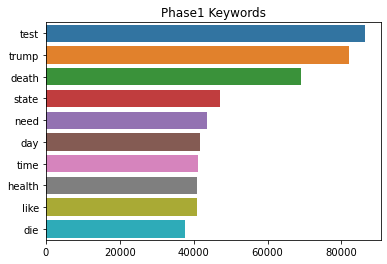

In [52]:
sns.barplot(phase_1_counts, phase_1_words).set(title="Phase1 Keywords")

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Phase2 Keywords')]

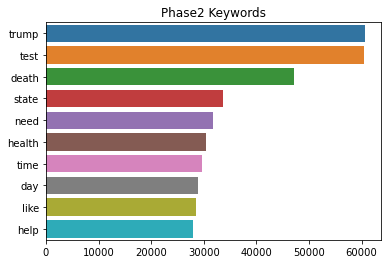

In [53]:
sns.barplot(phase_2_counts, phase_2_words).set(title="Phase2 Keywords")

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Phase3 Keywords')]

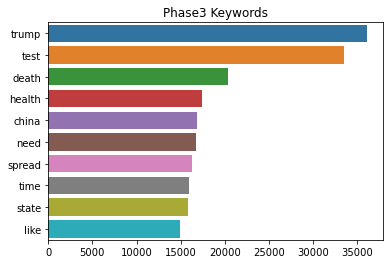

In [55]:
sns.barplot(phase_3_counts, phase_3_words).set(title="Phase3 Keywords")

## "Vaccine"

In [57]:
phase1_vaccine_words = [i[0] for i in model_1.wv.most_similar("vaccine")]
phase1_vaccine_counts = [i[1] for i in model_1.wv.most_similar("vaccine")]
phase2_vaccine_words = [i[0] for i in model_2.wv.most_similar("vaccine")]
phase2_vaccine_counts = [i[1] for i in model_2.wv.most_similar("vaccine")]
phase3_vaccine_words = [i[0] for i in model_3.wv.most_similar("vaccine")]
phase3_vaccine_counts = [i[1] for i in model_3.wv.most_similar("vaccine")]

In [95]:
twitter_counts_words = [i[0] for i in model_twitter_count.wv.most_similar("vaccine")]
twitter_counts_counts = [i[1] for i in model_twitter_count.wv.most_similar("vaccine")]
bing_counts_words = [i[0] for i in model_bing.wv.most_similar("vaccine")]
bing_counts_counts = [i[1] for i in model_bing.wv.most_similar("vaccine")]
twitter_topic_modeling_words = [i[0] for i in model_twitter.wv.most_similar("vaccine")]
twitter_topic_modeling_counts = [i[1] for i in model_twitter.wv.most_similar("vaccine")]

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Words from Twitter')]

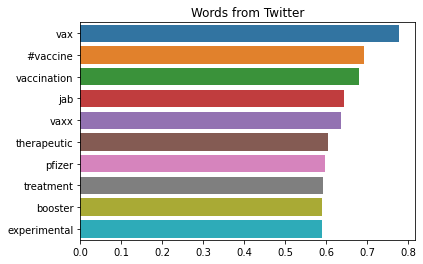

In [96]:
sns.barplot(twitter_counts_counts, twitter_counts_words).set(title="Words from Twitter")

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Words from Twitter + Topic Modeling')]

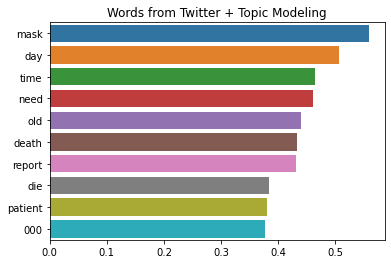

In [99]:
sns.barplot(twitter_topic_modeling_counts, twitter_topic_modeling_words).set(title="Words from Twitter + Topic Modeling")

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, 'Words from Bing')]

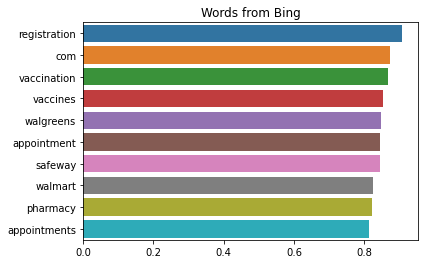

In [98]:
sns.barplot(bing_counts_counts, bing_counts_words).set(title="Words from Bing")

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, "Words 'similar' to 'Vaccine' in Phase1")]

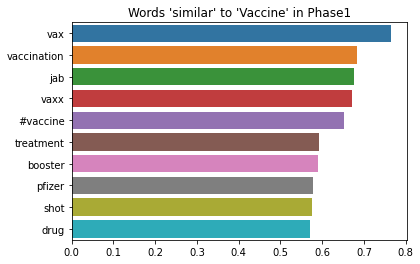

In [62]:
sns.barplot(phase1_vaccine_counts, phase1_vaccine_words).set(title="Words 'similar' to 'Vaccine' in Phase1")

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, "Words 'similar' to 'Vaccine' in Phase2")]

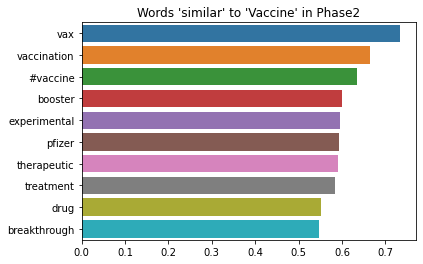

In [60]:
sns.barplot(phase2_vaccine_counts, phase2_vaccine_words).set(title="Words 'similar' to 'Vaccine' in Phase2")

/sw/arcts/centos7/python3.8-anaconda/2021.05/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 1.0, "Words 'similar' to 'Vaccine' in Phase3")]

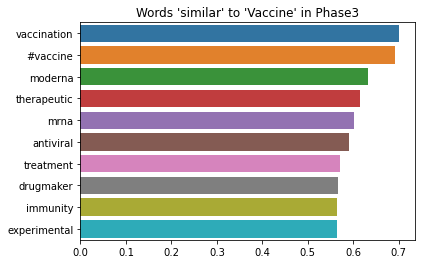

In [61]:
sns.barplot(phase3_vaccine_counts, phase3_vaccine_words).set(title="Words 'similar' to 'Vaccine' in Phase3")

In [ ]:
model_all = 

## "Anti"

In [101]:
model_1.wv.most_similar("anti")

[('satanic', 0.6215192675590515),
 ('nazi', 0.6171866059303284),
 ('vaxxers', 0.5901579260826111),
 ('demonize', 0.5840884447097778),
 ('masker', 0.5749337077140808),
 ('hateful', 0.5747749209403992),
 ('insert', 0.5742587447166443),
 ('purge', 0.5725164413452148),
 ('muh', 0.5693408846855164),
 ('qanon', 0.5631487965583801)]

In [102]:
model_2.wv.most_similar("anti")

[('vaxxers', 0.6337014436721802),
 ('demonize', 0.6198180913925171),
 ('nazi', 0.6015437245368958),
 ('...\\n\\n...', 0.5943744778633118),
 ('plot', 0.590821385383606),
 ('antifa', 0.5900329351425171),
 ('aborted', 0.5869516730308533),
 ('inject', 0.5863176584243774),
 ('weaponize', 0.577591061592102),
 ('evil', 0.5708053708076477)]

In [103]:
model_3.wv.most_similar("anti")

[('invent', 0.7062499523162842),
 ('tobacco', 0.7049910426139832),
 ('barbaric', 0.6785112023353577),
 ('aborted', 0.6748347282409668),
 ('poison', 0.6738482117652893),
 ('pig', 0.6714370846748352),
 ('cabal', 0.6700368523597717),
 ('guinea', 0.6553593277931213),
 ('weaponize', 0.6515437960624695),
 ('demonize', 0.6506271362304688)]

In [104]:
model_all.wv.most_similar("anti")

[('reimbursement', 0.3464525640010834),
 ('cali', 0.3433603048324585),
 ('hospitall', 0.3424878716468811),
 ('across', 0.3204272985458374),
 ('palomar', 0.31468263268470764),
 ('michgan.gov/coronavirus', 0.3135429918766022),
 ('jog', 0.3121076822280884),
 ('krogercovid', 0.3091491758823395),
 ('herald', 0.3091263771057129),
 ('turnaround', 0.30669185519218445)]

In [105]:
model_bing.wv.most_similar("anti")

[('reimbursement', 0.3464525640010834),
 ('cali', 0.3433603048324585),
 ('hospitall', 0.3424878716468811),
 ('across', 0.3204272985458374),
 ('palomar', 0.31468263268470764),
 ('michgan.gov/coronavirus', 0.3135429918766022),
 ('jog', 0.3121076822280884),
 ('krogercovid', 0.3091491758823395),
 ('herald', 0.3091263771057129),
 ('turnaround', 0.30669185519218445)]

In [108]:
model_twitter.wv.most_similar("anti")

KeyError: "Key 'anti' not present"

In [121]:
import gensim.downloader
glove_vectors_50 = gensim.downloader.load('glove-twitter-50')
glove_vectors_50.most_similar('vaccine')

[('vaccination', 0.8900145292282104),
 ('meningitis', 0.8499026298522949),
 ('bacterial', 0.8383343815803528),
 ('symptoms', 0.8279889225959778),
 ('hpv', 0.8261769413948059),
 ('outbreak', 0.8258467316627502),
 ('polio', 0.8256186842918396),
 ('vaccinations', 0.8233392834663391),
 ('shortage', 0.8210859298706055),
 ('obesity', 0.821054220199585)]

In [122]:
glove_vectors_50 = gensim.downloader.load('glove-twitter-50')
glove_vectors_50.most_similar('vaccine')

[=====---------------------------------------------] 11.7% 23.4/199.5MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[=================---------------------------------] 35.9% 71.7/199.5MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==============================--------------------] 60.2% 120.0/199.5MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==========================================--------] 84.5% 168.6/199.5MB downloaded

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 199.5/199.5MB downloaded


[('vaccination', 0.8371250629425049),
 ('prevention', 0.8025354146957397),
 ('hpv', 0.7959522604942322),
 ('antibiotic', 0.7884636521339417),
 ('diagnosis', 0.7792864441871643),
 ('meningitis', 0.774547278881073),
 ('outbreak', 0.7740582227706909),
 ('hepatitis', 0.767277181148529),
 ('tuberculosis', 0.7635110020637512),
 ('hiv', 0.7592238783836365)]

In [ ]:
('vaccination', 0.8900145292282104),
 ('meningitis', 0.8499026298522949),
 ('bacterial', 0.8383343815803528),
 ('symptoms', 0.8279889225959778),
 ('hpv', 0.8261769413948059),
 ('outbreak', 0.8258467316627502),
 ('polio', 0.8256186842918396),
 ('vaccinations', 0.8233392834663391),
 ('shortage', 0.8210859298706055),
 ('obesity', 0.821054220199585)]

In [2]:
words=['vaccination','meningitis', 'bacterial', 'symptoms','hpv','outbreak','polio','vaccinations', 'shortage', 'obesity']
nums=[ 0.8900145292282104, 0.8499026298522949, 0.8383343815803528, 0.8279889225959778, 0.8261769413948059, 0.8258467316627502, 0.8256186842918396, 0.8233392834663391, 0.8210859298706055, 0.821054220199585]
  
  
  
  
  

[Text(0.5, 1.0, 'Words from Twitter(Baseline Model)')]

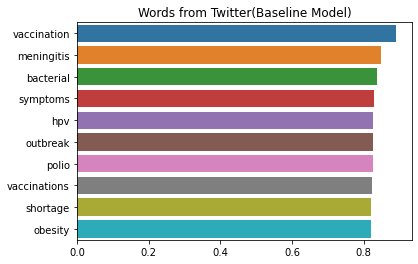

In [5]:
sns.barplot(x=nums, y=words).set(title="Words from Twitter(Baseline Model)")